In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
BATCH = 64
EPOCHS = 20

## importing data

In [3]:
train = np.loadtxt("train.csv", delimiter=",", skiprows=1)
labels = train[:, 0:1].astype('float32')
train = np.delete(train, 0, axis=1).astype('float32') / 255.0

In [4]:
test = np.loadtxt('test.csv', delimiter=',', skiprows=1)
test = test.astype('float32') / 255.0

In [5]:
X_train, x_val, y_train, y_val = train_test_split(train, labels, test_size=0.2)

In [6]:
y_train = to_categorical(y_train, 10)
y_val = to_categorical(y_val, 10)
print(y_train.shape)
print(y_val.shape)

(33600, 10)
(8400, 10)


In [7]:
model_input = tf.keras.Input(shape=X_train[0].shape)
x = Dense(784, activation='relu')(model_input)
x = Dropout(0.3)(x)
x = Dense(392, activation='relu')(x)
x = Dropout(0.3)(x)
x = Dense(196, activation='relu')(x)
x = Dropout(0.3)(x)
x = Dense(64, activation='relu')(x)
x = Dropout(0.3)(x)
x = Dense(10, activation='relu')(x)
out = Dense(10, activation='softmax')(x)

model = tf.keras.Model(inputs= model_input, outputs=out)
opt = tf.keras.optimizers.SGD(learning_rate=0.2, momentum=0.5)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [8]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense (Dense)                (None, 784)               615440    
_________________________________________________________________
dropout (Dropout)            (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 392)               307720    
_________________________________________________________________
dropout_1 (Dropout)          (None, 392)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 196)               77028     
_________________________________________________________________
dropout_2 (Dropout)          (None, 196)               0     

In [9]:
hist = model.fit(X_train, y_train, batch_size=BATCH, epochs=EPOCHS, validation_data=(x_val,y_val), verbose=1)

Epoch 1/20
525/525 [==============================] - 3s 5ms/step - loss: 1.0380 - accuracy: 0.6468 - val_loss: 0.2901 - val_accuracy: 0.9232
Epoch 2/20
525/525 [==============================] - 2s 5ms/step - loss: 0.2833 - accuracy: 0.9249 - val_loss: 0.1528 - val_accuracy: 0.9583
Epoch 3/20
525/525 [==============================] - 2s 5ms/step - loss: 0.2092 - accuracy: 0.9447 - val_loss: 0.1303 - val_accuracy: 0.9651
Epoch 4/20
525/525 [==============================] - 2s 5ms/step - loss: 0.1589 - accuracy: 0.9585 - val_loss: 0.1300 - val_accuracy: 0.9662
Epoch 5/20
525/525 [==============================] - 2s 5ms/step - loss: 0.1501 - accuracy: 0.9585 - val_loss: 0.1129 - val_accuracy: 0.9705
Epoch 6/20
525/525 [==============================] - 2s 5ms/step - loss: 0.1206 - accuracy: 0.9679 - val_loss: 0.1238 - val_accuracy: 0.9648
Epoch 7/20
525/525 [==============================] - 2s 5ms/step - loss: 0.1160 - accuracy: 0.9697 - val_loss: 0.0980 - val_accuracy: 0.9749
Epoch 

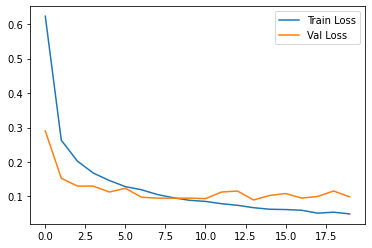

In [10]:
plt.plot(hist.history["loss"], label="Train Loss")
plt.plot(hist.history['val_loss'], label="Val Loss")
plt.legend()

In [11]:
predictions = model.predict(test)
train_preds = model.predict(X_train)
model_eval = model.evaluate(X_train, y_train)


1050/1050 [==============================] - 2s 2ms/step - loss: 0.0127 - accuracy: 0.9966


In [12]:
print(np.where(predictions[0] == np.amax(predictions[0]))[0][0])

2


In [13]:
train_preds = [np.where(train_preds[i] == np.amax(train_preds[i]))[0][0] for i in range(len(train_preds))]

In [14]:
submission = pd.DataFrame()
submission['ImageId'] = [i+1 for i in range(len(test))]
submission['Label'] = [np.where(predictions[i] == np.amax(predictions[i]))[0][0] for i in range(len(predictions))]

In [15]:
submission.to_csv('submission.csv',index=False)